In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d = {'Name':['Ankit','Shreya','Akansha','Riddhi','Shubham','Rahul',
            'Mridul','Harsh','Yashika','Ritwik','Sharvil','Ritesh',
            'Saurav','Pankaj','Prashant','Ritu'],
     'City':['Mumbai','Delhi','Pune','Mumbai','Mumbai','Delhi','Lucknow',
            'Pune','Delhi','Kolkata','Pune','Pune','Kolkata','Delhi','Lucknow','Delhi'],
    'Math_Score':[78,67,56,45,34,89,32,93,78,82,90,81,74,65,56,85],
     'Co_Curr_Score':[6.7,np.nan,7.0,9.0,8.1,3.8,2.3,5.1,6.3,7.5,3.4,5.1,7.8,9.1,6.7,8.0],
    'Fee_Discount(%age)':[5,0,0,10,5,15,20,10,10,20,0,10,15,20,5,0],
    'Opted_Bus':[1,0,0,1,1,1,1,0,0,1,0,1,0,0,1,1],
    'Personality_Score':[3.2,1.9,4.1,4.2,3.9,np.nan,3.5,2.4,4.4,3.6,4.0,3.2,3.6,4.4,4.0,3.8],
     'Fee':['P','R','P','R','P','P','R','R','R','P','P','R','P','R','P','P'],
    'Age':[23,19,22,20,21,23,24,20,19,23,22,20,19,18,np.nan,24]}

# Fee = 'P' = pending, 'R'= Recieved
# Opted Bus = 1- opted for bus, 0- not opted for bus
#df = pd.DataFrame(d)
#df.head(15)


Questions

1) Read the dataset<br>
2) Remove/ Handle null values if any<br>
3) Find the description of the dataset<br>
4) Depict different city count on a bar chart and a line chart separately<br>
5) Depict quartile distribution of Personality Score<br>
6) Depcit frequency distribution of Age<br>
7) For all those students with personality score>3.0 depict percentage distribution of Maths score obtained of all the students on a chart<br>
8) For all those students opted for Bus, find the Avg Co_Curr_Score<br>
9) Depict the Personality_Score vs Co_Curr_Score on a scatter plot<br>
10) Depict mean of Math score based on City on a bar and a line chart superimposed<br>
11) For all those students who fees is pending(P) or who have opted for bus, find mean of Personality Score and Co_Curr Score<br>

 



In [4]:
#q1) Read the dataset
df = pd.DataFrame(d)
df.head(15)

,Name,City,Math_Score,Co_Curr_Score,Fee_Discount(%age),Opted_Bus,Personality_Score,Fee,Age
0,Ankit,Mumbai,78,6.7,5,1,3.2,P,23.0
1,Shreya,Delhi,67,NaN,0,0,1.9,R,19.0
2,Akansha,Pune,56,7.0,0,0,4.1,P,22.0
3,Riddhi,Mumbai,45,9.0,10,1,4.2,R,20.0
4,Shubham,Mumbai,34,8.1,5,1,3.9,P,21.0
5,Rahul,Delhi,89,3.8,15,1,NaN,P,23.0
6,Mridul,Lucknow,32,2.3,20,1,3.5,R,24.0
7,Harsh,Pune,93,5.1,10,0,2.4,R,20.0
8,Yashika,Delhi,78,6.3,10,0,4.4,R,19.0
9,Ritwik,Kolkata,82,7.5,20,1,3.6,P,23.0


In [5]:
#2) Remove/ Handle null values if any<br>
df.isnull().sum()
#d1=df.dropna()
#d1

Name                  0
City                  0
Math_Score            0
Co_Curr_Score         1
Fee_Discount(%age)    0
Opted_Bus             0
Personality_Score     1
Fee                   0
Age                   1
dtype: int64

In [6]:
df['Co_Curr_Score'].fillna(df['Co_Curr_Score'].mean(),inplace=True)
df['Personality_Score'].fillna(df['Personality_Score'].mean(),inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [7]:
df.isnull().sum()

Name                  0
City                  0
Math_Score            0
Co_Curr_Score         0
Fee_Discount(%age)    0
Opted_Bus             0
Personality_Score     0
Fee                   0
Age                   0
dtype: int64

In [8]:
#3) Find the description of the dataset<br>
df.describe()

,Math_Score,Co_Curr_Score,Fee_Discount(%age),Opted_Bus,Personality_Score,Age
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,69.062500,6.393333,9.062500,0.562500,3.613333,21.133333
std,19.495192,1.986107,7.352721,0.512348,0.683000,1.927578
min,32.000000,2.300000,0.000000,0.000000,1.900000,18.000000
25%,56.000000,5.100000,3.750000,0.000000,3.425000,19.750000
50%,76.000000,6.700000,10.000000,1.000000,3.706667,21.066667
75%,82.750000,7.850000,15.000000,1.000000,4.025000,23.000000
max,93.000000,9.100000,20.000000,1.000000,4.400000,24.000000


In [9]:
#4) Depict different city count on a bar chart and a line chart separately<br>
r4 = df['City'].value_counts()
r4

Delhi      5
Pune       4
Mumbai     3
Lucknow    2
Kolkata    2
Name: City, dtype: int64

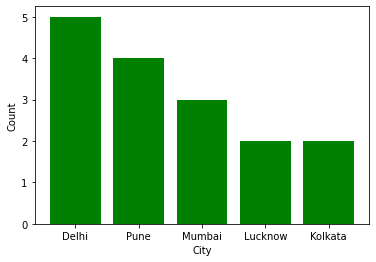

In [10]:
plt.bar(r4.index,r4.values,color='green')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

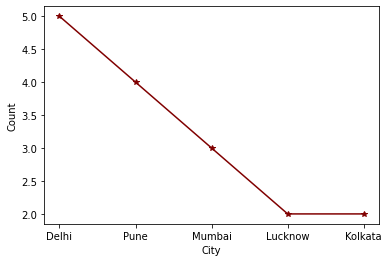

In [11]:
plt.plot(r4.index,r4.values,color='maroon',marker='*')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

In [12]:
#5) Depict quartile distribution of Personality Score<br>
df.columns

Index(['Name', 'City', 'Math_Score', 'Co_Curr_Score', 'Fee_Discount(%age)',
       'Opted_Bus', 'Personality_Score', 'Fee', 'Age'],
      dtype='object')

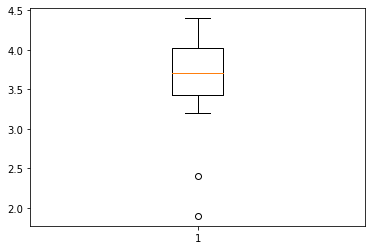

In [13]:
#plt.boxplot(df['Personality_Score'])
#plt.show()
plt.boxplot(df['Personality_Score'])
plt.show()



In [14]:
#6) Depcit frequency distribution of Age
df['Age'].value_counts()

23.000000    3
19.000000    3
20.000000    3
22.000000    2
24.000000    2
21.000000    1
18.000000    1
21.133333    1
Name: Age, dtype: int64

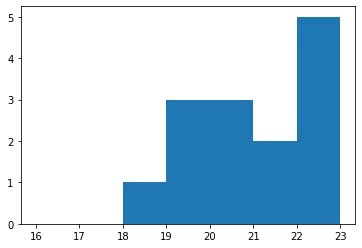

In [15]:
plt.hist(df['Age'],bins=list(range(16,24)))
plt.show()

In [16]:
#7) For all those students with personality score>3.0 depict percentage distribution of Maths score obtained of all the students on a chart


In [17]:
df.columns

Index(['Name', 'City', 'Math_Score', 'Co_Curr_Score', 'Fee_Discount(%age)',
       'Opted_Bus', 'Personality_Score', 'Fee', 'Age'],
      dtype='object')

In [18]:
r=df[df['Personality_Score']>3.0]
r.shape

(14, 9)

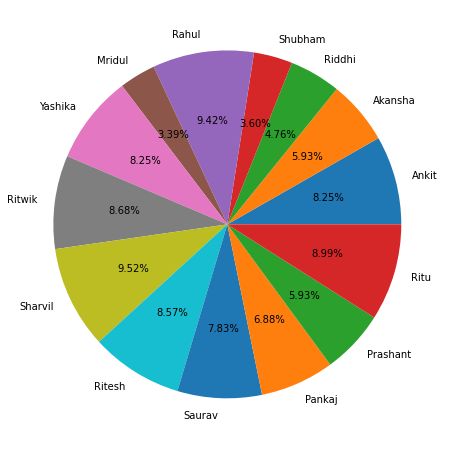

In [19]:
plt.figure(figsize=(8,8))
plt.pie(r['Math_Score'],labels=r['Name'],autopct='%.2f%%')
plt.show()

In [23]:
#8) For all those students opted for Bus, find the Avg Co_Curr_Score
df7=df[df['Opted_Bus']==1]
df7['Co_Curr_Score'].mean()

6.355555555555556

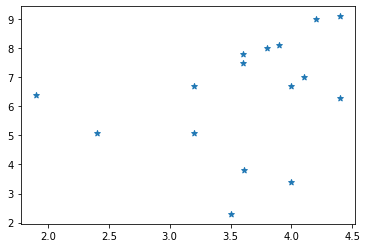

In [28]:
#9) Depict the Personality_Score vs Co_Curr_Score on a scatter plot
plt.scatter(df['Personality_Score'],df['Co_Curr_Score'],marker='*')
plt.show()



In [27]:
#10) Depict mean of Math score based on City on a bar and a line chart superimposed
df8 = df.groupby(['City'])['Math_Score'].mean()
df8

City
Delhi      76.800000
Kolkata    78.000000
Lucknow    44.000000
Mumbai     52.333333
Pune       80.000000
Name: Math_Score, dtype: float64

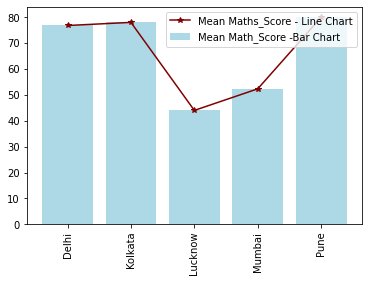

In [29]:
plt.bar(df8.index,df8.values,color='lightblue',label='Mean Math_Score -Bar Chart')
plt.plot(df8.index,df8.values,color='maroon',label='Mean Maths_Score - Line Chart',marker='*')
plt.xticks(rotation=90)
plt.legend()
plt.show()